In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from plotting import plot_utils, summary_plots, load_fits, plot_prf_params, pycortex_plot_utils
plot_utils.set_all_font_sizes(12)
from utils import roi_utils, default_paths, stats_utils, nsd_utils

In [42]:
# Load results of the fitting procedure
subjects = np.arange(1,9)
n_subjects = len(subjects)

feature_type_list_long = ['gabor_solo_ridge_12ori_8sf',\
                 'texture_pyramid_ridge_4ori_4sf_pca_HL','sketch_tokens',\
                 'alexnet_best_layer_pca', 'clip_RN50_best_layer_pca', \
                          'full_midlevel', 'full_midlevel_plus_all_coco_categ_pca']
feature_type_list = ['gabor',\
                 'texture_pyramid','sketch_tokens',\
                 'alexnet', 'clip','combined_midlevel', 'combined_midlevel_semantic']
n_models = len(feature_type_list)
out_list = []
for fi, fitting_type in enumerate(feature_type_list_long):

    out = [load_fits.load_fit_results(subject=ss, fitting_type=fitting_type, \
                                      n_from_end=0, verbose=False) \
           for ss in subjects]
    out_list.append(out)
    
out = out_list
    
fig_save_folder=None

In [44]:
# initialize roi_def objects to get roi indices
roi_def = roi_utils.multi_subject_roi_def(subjects)
roi_names =roi_def.roi_names
n_rois = roi_def.n_rois

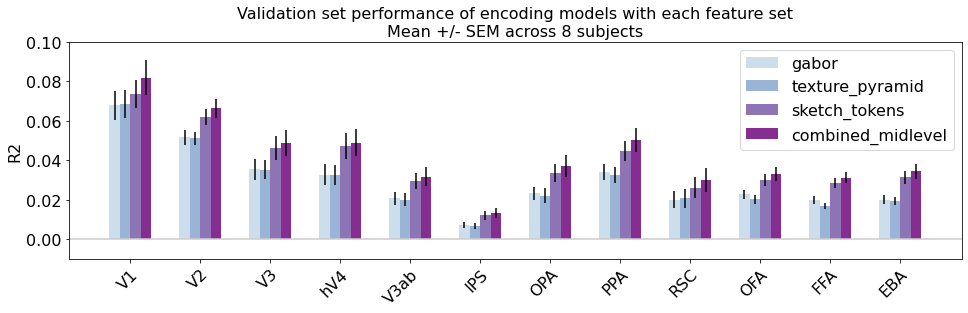

In [32]:
# Plot just the midlevel models

mm2plot = [0,1,2,5]

colors = cm.BuPu(np.linspace(0,1,6))[1:5,:]
# colors = cm.Purples(np.linspace(0,1,6))[1:5,:]

nc_thresh = 0.01

vals = np.zeros((n_subjects, n_rois, len(mm2plot)))

for fi, mm in enumerate(mm2plot):

    for si, ss in enumerate(subjects):

        val_r2 = out[mm][si]['val_r2'][:,0]    
        
        nc = nsd_utils.ncsnr_to_nc(out[fi][si]['voxel_ncsnr'][out[fi][si]['voxel_mask']])/100
        inds2use = nc>nc_thresh

        for ri in range(n_rois):

            inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri) & inds2use
        
            vals[si,ri,fi] = np.mean(val_r2[inds_this_roi])

mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title='Validation set performance of encoding models with each feature set\nMean +/- SEM across 8 subjects'

plt.rcParams['pdf.fonttype']=42

plot_utils.set_all_font_sizes(fs = 16)
bw = 0.15;
space = (1 - (bw*mean_vals.shape[1]))/2
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=space, \
                xticklabels=roi_names, ylabel='R2', \
                ylim=[-0.01, 0.10], title=title, horizontal_line_pos=0,\
                legend_labels=np.array(feature_type_list)[mm2plot], \
                legend_overlaid=True, legend_separate=False, \
                fig_size=(16,4))


# plt.rcParams.update({'font.size': 10})
# plt.rcParams['ps.fonttype']=42    
fn2save = '/user_data/mmhender/imStat/figures/lower_level_visual_R2.pdf'
plt.savefig(fn2save)

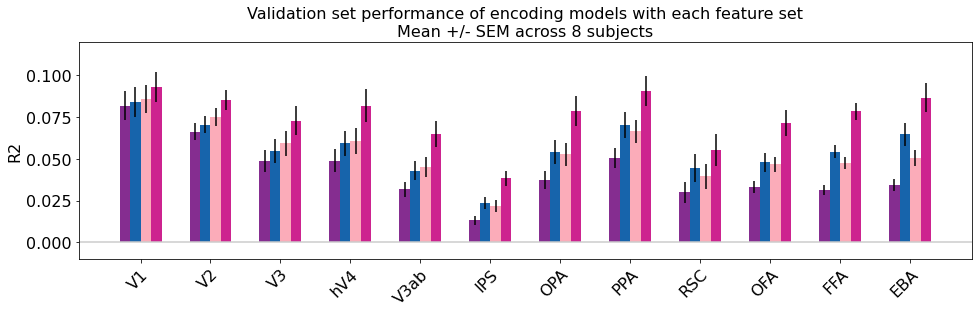

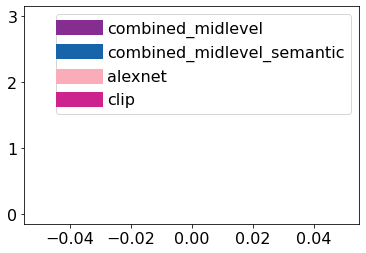

In [63]:
# Plot the DNN models

mm2plot = [5,6, 3,4]

dnn_colors = cm.RdPu(np.linspace(0,1,4))[1:3,:]
midlevel_color = cm.BuPu(np.linspace(0,1,6))[4:5,:]
# combined_color = np.array([[0.4, 0.4, 0.4, 1]])
combined_color = cm.Blues(np.linspace(0,1,6))[4:5,:]

colors = np.concatenate([midlevel_color, combined_color, dnn_colors], axis=0)

nc_thresh = 0.01

vals = np.zeros((n_subjects, n_rois, len(mm2plot)))

for fi, mm in enumerate(mm2plot):

    for si, ss in enumerate(subjects):

        val_r2 = out[mm][si]['val_r2'][:,0]    
        
        nc = nsd_utils.ncsnr_to_nc(out[fi][si]['voxel_ncsnr'][out[fi][si]['voxel_mask']])/100
        inds2use = nc>nc_thresh

        for ri in range(n_rois):

            inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri) & inds2use
        
            vals[si,ri,fi] = np.mean(val_r2[inds_this_roi])

mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title='Validation set performance of encoding models with each feature set\nMean +/- SEM across 8 subjects'

plt.rcParams['pdf.fonttype']=42

plot_utils.set_all_font_sizes(fs = 16)
bw = 0.15;
space = (1 - (bw*mean_vals.shape[1]))/2
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=space, \
                xticklabels=roi_names, ylabel='R2', \
                ylim=[-0.01, 0.12],title=title, horizontal_line_pos=0,\
                legend_labels=np.array(feature_type_list)[mm2plot], \
                legend_overlaid=False, legend_separate=True, \
                fig_size=(16,4))


# fn2save = '/user_data/mmhender/imStat/figures/DNNs_R2.pdf'
# plt.savefig(fn2save)

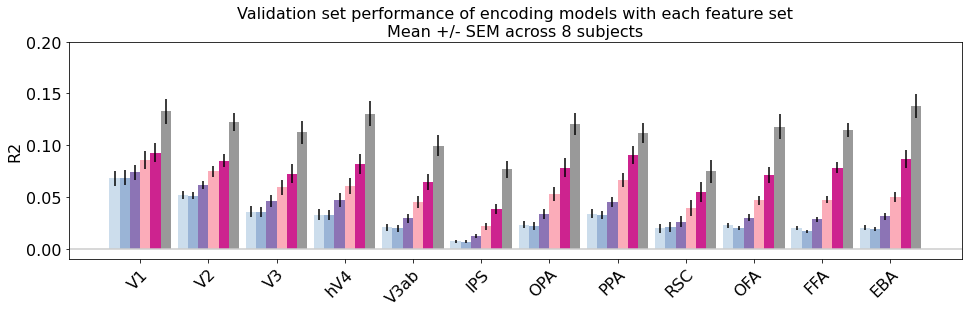

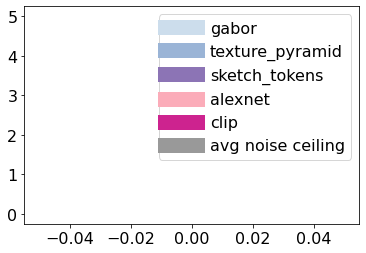

In [57]:
# Plot everything, plus noise ceiling

mm2plot = [0,1,2,3,4]

dnn_colors = cm.RdPu(np.linspace(0,1,4))[1:3,:]
midlevel_colors = cm.BuPu(np.linspace(0,1,6))[1:4,:]

colors = np.concatenate([midlevel_colors, dnn_colors], axis=0)

nc_thresh = 0.01

vals = np.zeros((n_subjects, n_rois, len(mm2plot)))

for fi, mm in enumerate(mm2plot):

    for si, ss in enumerate(subjects):

        val_r2 = out[mm][si]['val_r2'][:,0]    
        
        nc = nsd_utils.ncsnr_to_nc(out[fi][si]['voxel_ncsnr'][out[fi][si]['voxel_mask']])/100
        inds2use = nc>nc_thresh

        for ri in range(n_rois):

            inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri) & inds2use
        
            vals[si,ri,fi] = np.mean(val_r2[inds_this_roi])
            

nc_vals = np.zeros((n_subjects, n_rois, 1))

fi=0

for si, ss in enumerate(subjects):
    
    voxel_ncsnr = out[fi][si]['voxel_ncsnr'].ravel()[out[fi][si]['voxel_index'][0]]
    noise_ceiling = nsd_utils.ncsnr_to_nc(voxel_ncsnr)/100

    for ri in range(n_rois):

        inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri)

        nc_vals[si,ri,fi] = np.mean(noise_ceiling[inds_this_roi])

vals = np.concatenate([vals, nc_vals], axis=2)

colors = np.concatenate([colors, np.array([[0.6, 0.6, 0.6, 1]])], axis=0)

names = [feature_type_list[mm] for mm in mm2plot] + ['avg noise ceiling']

            
mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)



legend_separate=True
title='Validation set performance of encoding models with each feature set\nMean +/- SEM across 8 subjects'

plt.rcParams['pdf.fonttype']=42

plot_utils.set_all_font_sizes(fs = 16)
bw = 0.15;
space = (1 - (bw*mean_vals.shape[1]))/2

fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=space, \
                xticklabels=roi_names, ylabel='R2', \
                ylim=[-0.01, 0.20], title=title, horizontal_line_pos=0,\
                legend_labels=names, \
                legend_overlaid=False, legend_separate=True, \
                fig_size=(16,4))


# plt.rcParams.update({'font.size': 10})
# plt.rcParams['ps.fonttype']=42    
# fn2save = '/user_data/mmhender/imStat/figures/lower_level_visual_R2.pdf'
# plt.savefig(fn2save)